In [261]:
import pandas as pd
import numpy as np
housing = pd.read_csv('housingdata.csv')
housing_df = pd.DataFrame(housing)
housing_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


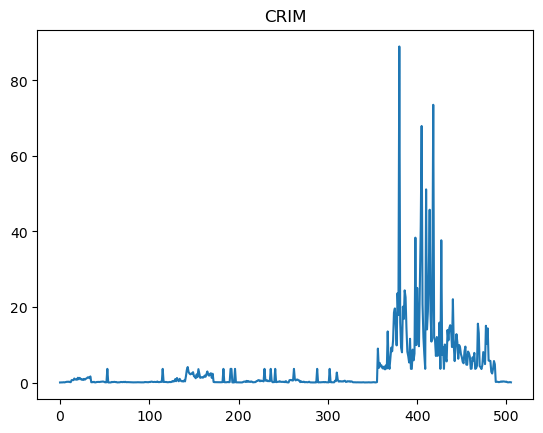

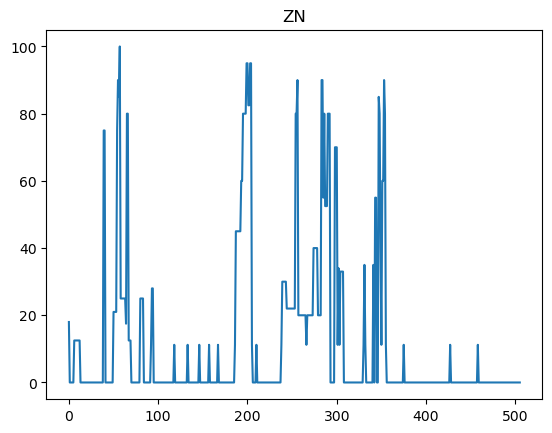

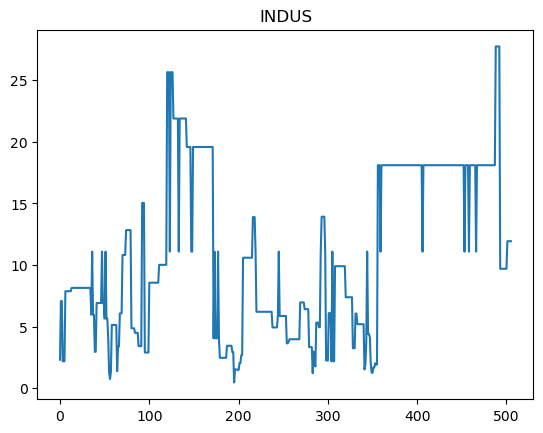

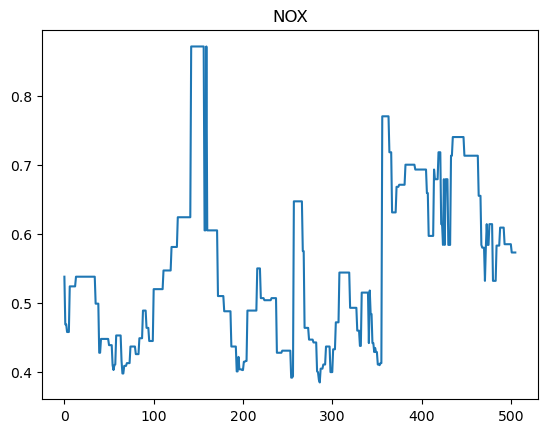

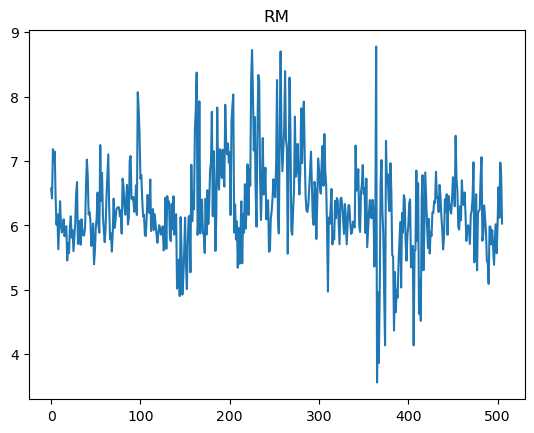

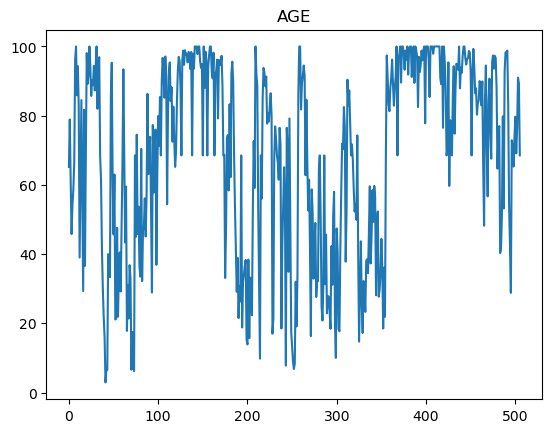

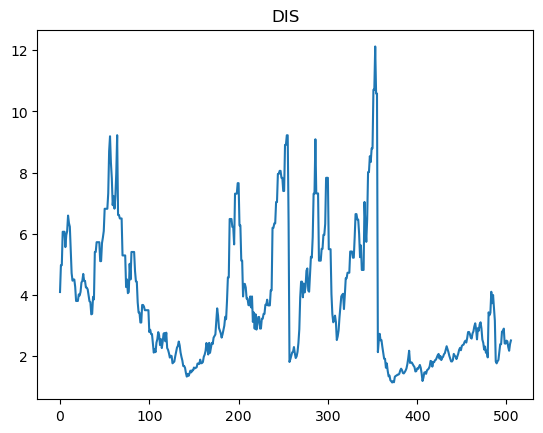

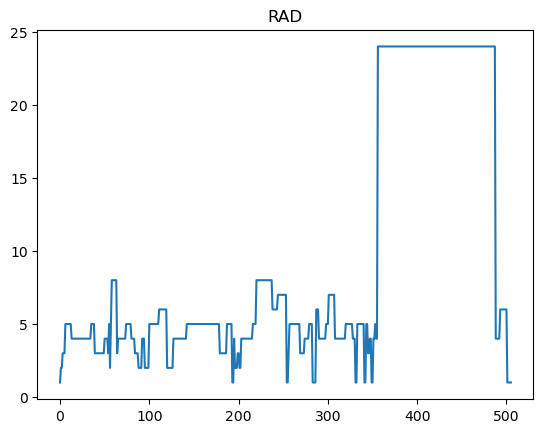

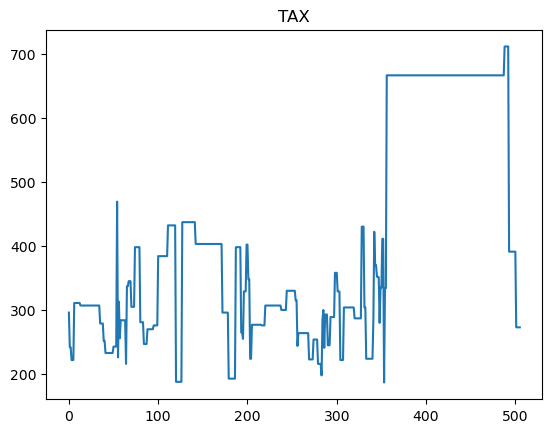

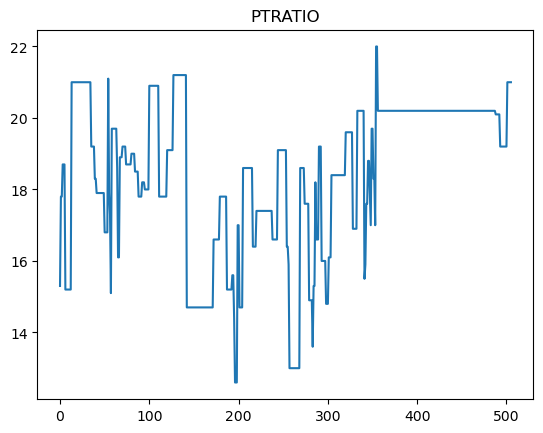

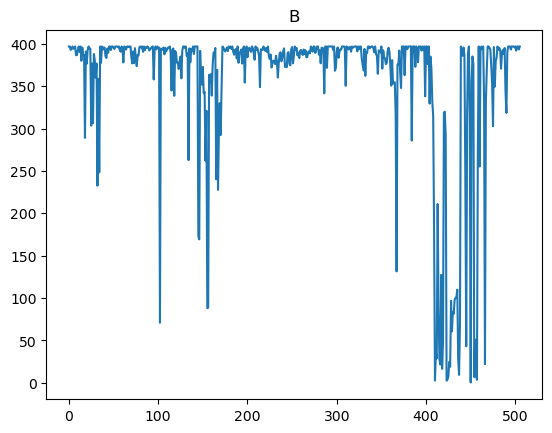

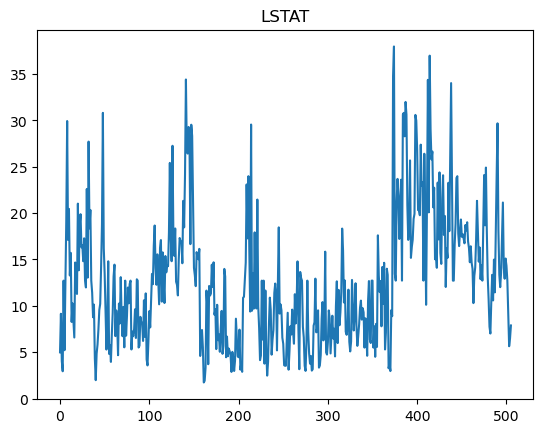

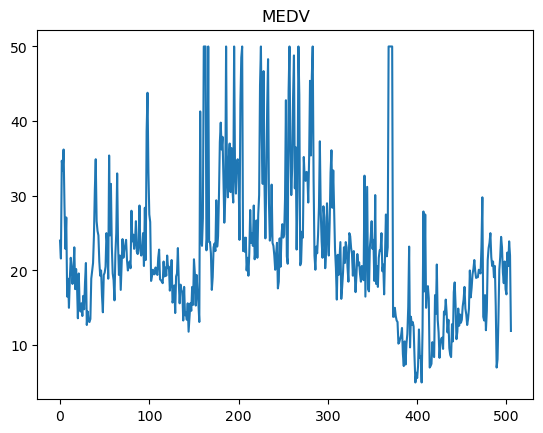

In [159]:
import matplotlib.pyplot as plt

columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

for i in columns:
    plt.figure()          
    plt.plot(housing_df[i])
    plt.title(i)
    plt.show()    

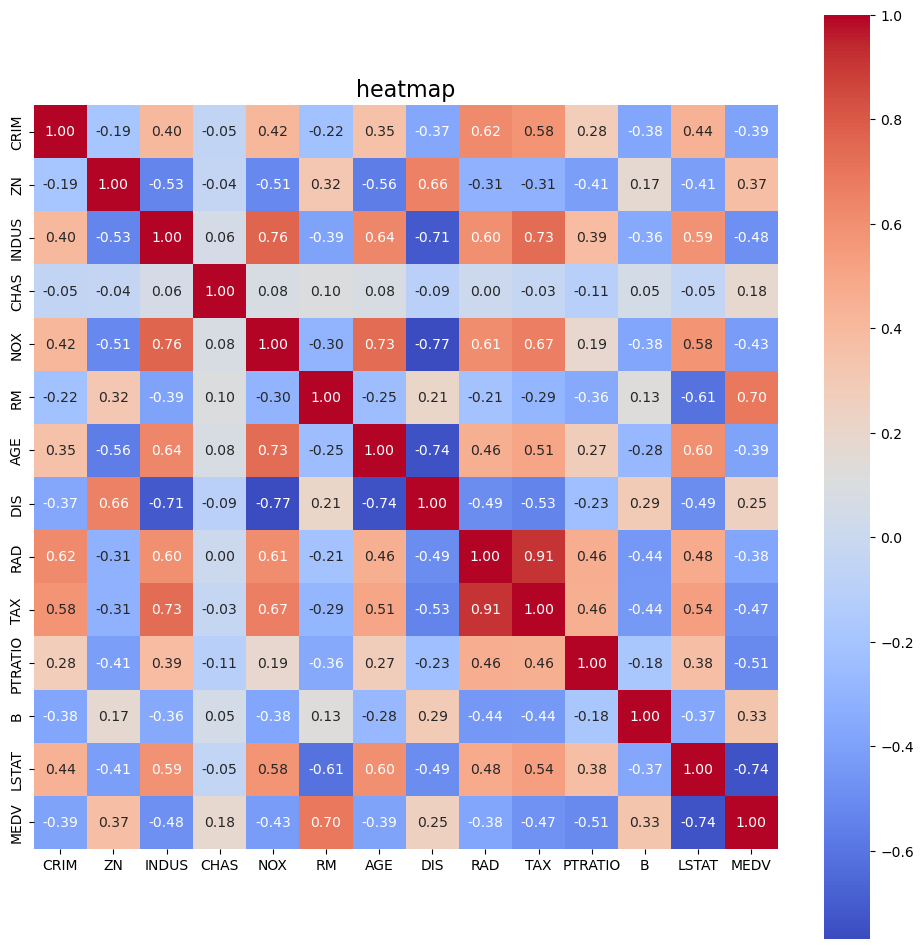

MEDV와의 상관관계:
 LSTAT     -0.735822
PTRATIO   -0.507787
INDUS     -0.481772
TAX       -0.468536
NOX       -0.427321
AGE       -0.394656
CRIM      -0.391363
RAD       -0.381626
CHAS       0.181391
DIS        0.249929
B          0.333461
ZN         0.373136
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64
AGE    -0.394656
CRIM   -0.391363
RAD    -0.381626
CHAS    0.181391
DIS     0.249929
B       0.333461
ZN      0.373136
Name: MEDV, dtype: float64


In [256]:
import seaborn as sns

corr_matrix = housing_df.corr()#수치형 데이터들의 상관계수 계산(피어슨 상관계수 = 절댓값이 1에 가까울수록 관계가 높음) 

plt.figure(figsize=(12, 12))  # 히트맵 크기
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True) # 정사각형의 각 셀에 숫자로 히트맵 생성
plt.title("heatmap", fontsize=16) 
plt.show()

target_corr = corr_matrix['MEDV'].sort_values(ascending=True) #결과값과의 상관관계를 기준으로 오름차순 정렬렬
print("MEDV와의 상관관계:\n", target_corr)

threshold = 0.4  # 기준값 설정
low_features = target_corr[target_corr.abs() < threshold] #기준값보다 낮은 상관관계를 가진 변수들을 추출
print(low_features)


In [257]:
#상관계수 낮은 열들은 삭제하고 진행
housing_df = housing_df.drop(['ZN','B','DIS','CHAS'], axis=1)

In [262]:
# 결측값 확인
print(housing_df.isnull().sum())

#각 열마다 결측값 처리
housing_df['CRIM'].fillna(housing_df['CRIM'].median(), inplace=True) #연속형데이터라서
housing_df['INDUS'].fillna(housing_df['INDUS'].median(), inplace=True) #연속형데이터라서
housing_df['NOX'].fillna(housing_df['NOX'].median(), inplace=True) #연속형데이터라서
housing_df['RM'].fillna(housing_df['RM'].median(), inplace=True) #연속형데이터라서
housing_df['AGE'].fillna(housing_df['AGE'].mean(), inplace=True) #연속형데이터라서
housing_df['RAD'].fillna(housing_df['RAD'].mode()[0], inplace=True) #정수형데이터라서 최빈값으로 대체
housing_df['TAX'].fillna(housing_df['TAX'].median(), inplace=True) #연속형데이터라서
housing_df['PTRATIO'].fillna(housing_df['PTRATIO'].median(), inplace=True) #연속형데이터라서
housing_df['LSTAT'].fillna(housing_df['LSTAT'].mean(), inplace=True) #연속형데이터라서


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
# IQR 방식 이상치 평균으로 대체
def iqr_mean(df, col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    df_mean = df[col].mean()
    df[col] = df[col].apply(lambda x: df_mean if x < lower_bound or x > upper_bound else x)
    return df

def iqr_remove(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


housing_df = iqr_mean(housing_df, 'PTRATIO')
housing_df = iqr_remove(housing_df, 'CRIM')
print(housing_df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  489.000000  471.000000  489.000000  469.000000  489.000000  489.000000   
mean     3.584164   10.422505   11.297751    0.072495    0.554228    6.253342   
std      8.699813   22.842845    6.657653    0.259582    0.116177    0.676162   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082650    0.000000    5.860000    0.000000    0.449000    5.880000   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.185000   
75%      3.535010    0.000000   18.100000    0.000000    0.624000    6.575000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  489.000000  489.000000  489.000000  489.000000  489.000000  489.000000   
mean    68.442233    3.786349    9.730061  412.566462   18.610838  355.642618   
std     27.524900    2.0625

C:\Users\USER\AppData\Local\Temp\ipykernel_21816\972318561.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: df_mean if x < lower_bound or x > upper_bound else x)


{'whiskers': [<matplotlib.lines.Line2D at 0x2c493ac3df0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c493ae42b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c493ac38b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c493ae4730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c493ae4940>],
 'means': []}

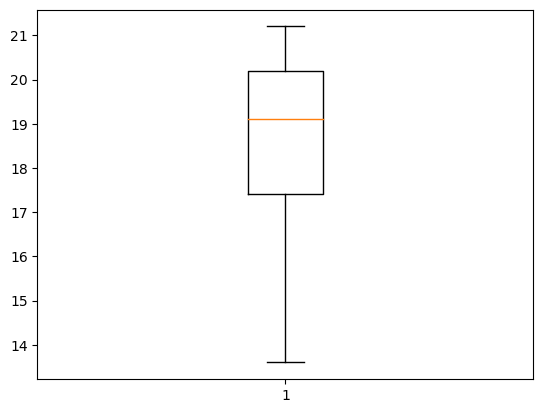

In [267]:
plt.boxplot(housing_df['PTRATIO'])

In [236]:
#데이터 로드
X = housing_df.drop(columns = ['MEDV'])
y = housing_df['MEDV']

#데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #표준화
X_train = scaler.fit_transform(X_train) #fit으로 계산하고 transform으로 적용까지
X_test = scaler.transform(X_test) #테스트 데이터는 새로운 기준값을 계산하면 훈련이 잘 못 될 수 있으므로 훈련 데이터에서 학습된 기준을 적용 


In [275]:
#선형회귀 모델 생성 및 학습
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_train,y_train)

#예측
y_pred = model_lin.predict(X_test)

#모델 평가
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = np.sqrt(mse)
r2_lin = r2_score(y_test, y_pred)
print(mse,mae,r2_lin)

26.232237163031723 5.1217416142394105 0.6422898692450848


In [277]:
#의사결정 나무 모델 생성 및 학습
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(max_depth=None,# 트리 최대 깊이
                              min_samples_split=2,# 내부 노드를 분할하기 위한 최소 샘플(행) 수
                              min_samples_leaf=1,# 리프 노드가 되기 위한 최소 샘플 수
                              max_features=None, #노드 분할 시 모든 feature를 고려
                              random_state=42 )
model_tree.fit(X_train,y_train)

#예측
y_pred = model_tree.predict(X_test)


#평가
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = np.sqrt(mse)
r2_tree = r2_score(y_test, y_pred)
print(mse,mae,r2_tree)

14.40019607843137 3.794759027715906 0.803634894343995


In [273]:
# 랜덤 포레스트 모델 생성 및 학습
from sklearn.ensemble import RandomForestRegressor

model_ran = RandomForestRegressor(n_estimators=100,    # 트리 개수
                               max_depth=None,     # 트리 최대 깊이
                               min_samples_split=2, # 내부 노드를 분할하기 위한 최소 샘플 수
                               min_samples_leaf=1,  # 리프 노드가 되기 위한 최소 샘플 수
                               random_state=42)
model_ran.fit(X_train, y_train)

# 예측
y_pred = model_ran.predict(X_test)

# 평가
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = np.sqrt(mse)
r2_ran = r2_score(y_test, y_pred)
print(mse,mae,r2_ran)

8.931045284313726 2.9884854499083184 0.8782137658875637


<BarContainer object of 3 artists>

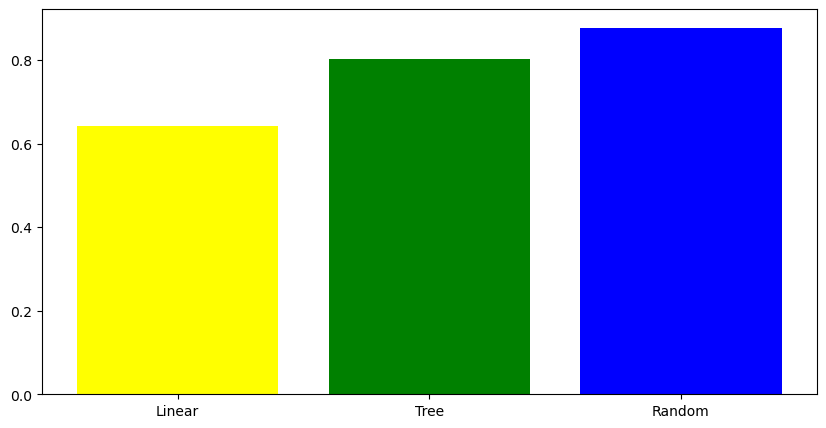

In [280]:
#각 모델 성능 시각화
models = ['Linear','Tree','Random']
r2s = [r2_lin,r2_tree,r2_ran]

plt.figure(figsize=(10,5))
plt.bar(models,r2s,color=['yellow','green','blue']) #막대그래프를 이터러블들로 x축 값들과 y축 값들 표현